In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [4]:
# Load in data
df_info=pd.read_csv('restaurant_labels.csv',index_col=0)
df_reviews=pd.read_csv('Restaurant_cumulative_reviews.csv',index_col=0)

In [5]:
df_info.head()

,business_id,name,review_count,& Probates,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,...,Wine Bars,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_info.describe()

,review_count,& Probates,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Adult Education,Adult Entertainment,...,Wine Bars,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
count,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,...,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000
mean,76.359643,0.000016,0.001220,0.000172,0.000031,0.000016,0.005614,0.000031,0.000047,0.000657,...,0.016843,0.000031,0.000203,0.000031,0.000813,0.000313,0.002940,0.000156,0.000156,0.000063
std,199.436953,0.003955,0.034905,0.013115,0.005593,0.003955,0.074719,0.005593,0.006849,0.025620,...,0.128683,0.005593,0.014257,0.005593,0.028505,0.017683,0.054143,0.012505,0.012505,0.007909
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10129.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df_reviews.head()

,business_id,all_reviews
0,HQl28KMwrEKHqhFrrDqVNQ,I love Deagan's. I do. I really do. The atmosp...
1,5JxlZaqCnk1MnbgRirs40Q,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
2,IS4cv902ykd8wj1TR0N3-A,"Oh happy day, finally have a Canes near my cas..."
3,nlxHRv1zXGT0c0K51q3jDg,This is definitely my favorite fast food sub s...
4,Pthe4qk5xh4n-ef-9bvMSg,"Really good place with simple decor, amazing f..."


In [42]:
df=pd.merge(df_reviews,df_info)

In [45]:
df.head()

,business_id,all_reviews,name,review_count,& Probates,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,...,Wine Bars,Wine Tasting Classes,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,HQl28KMwrEKHqhFrrDqVNQ,I love Deagan's. I do. I really do. The atmosp...,Deagan's Kitchen & Bar,417,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5JxlZaqCnk1MnbgRirs40Q,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",Cabo Mexican Restaurant,56,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,IS4cv902ykd8wj1TR0N3-A,"Oh happy day, finally have a Canes near my cas...",Raising Cane's Chicken Fingers,159,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,nlxHRv1zXGT0c0K51q3jDg,This is definitely my favorite fast food sub s...,Firehouse Subs,93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pthe4qk5xh4n-ef-9bvMSg,"Really good place with simple decor, amazing f...",Chon Thai Food,555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


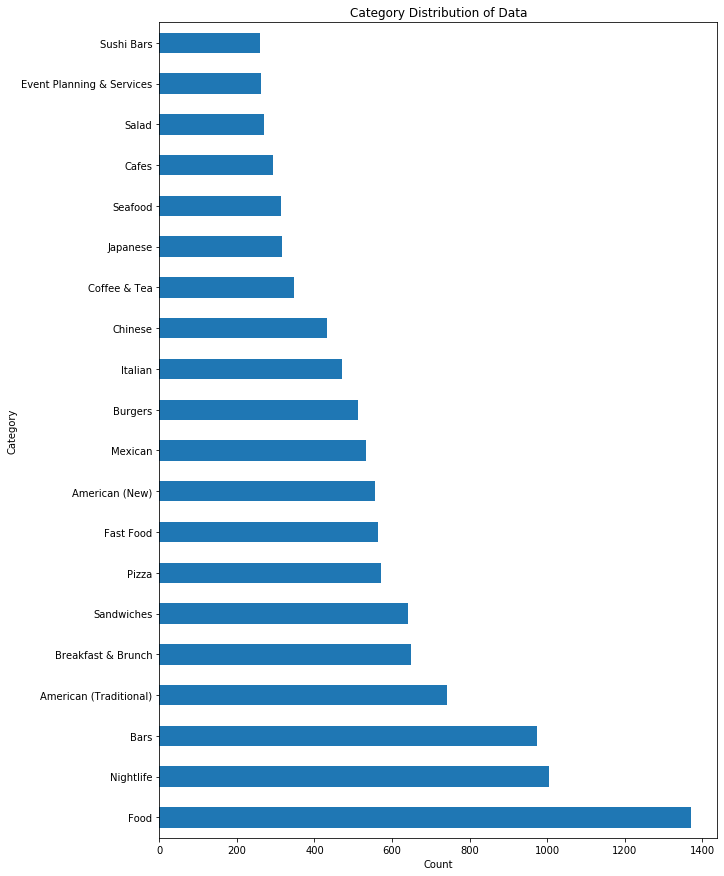

In [149]:
plt.title('Category Distribution of Data')
plt.ylabel('Category')
plt.xlabel('Count')

df.iloc[:,4:].sum().sort_values(ascending=False)[0:20].plot(kind='barh',figsize=(10,15))
plt.savefig('Actual_Category_Dist.png', dpi=300, bbox_inches='tight')

In [89]:
top_20=list(df.iloc[:,4:].sum().sort_values(ascending=False)[0:20].index)

In [90]:
cols=['business_id','name','review_count','all_reviews']
cols.extend(top_20)

In [91]:
df_20=df[cols]

In [92]:
df_20['has_label']=df_20[top_20].sum(axis=1)

C:\Users\Drago\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_20.drop(df_20.index[df_20['has_label']==0], inplace=True)

C:\Users\Drago\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
df_20.drop(columns=['has_label'],inplace=True)

In [95]:
# Only keep restaurants that have at least 10 reviews
df_20=df_20[df_20.review_count>=10].reset_index(drop=True)

In [98]:
df_20.shape

(4676, 24)

In [96]:
target_20=df_20.iloc[:,4:]

In [97]:
reviews_20=df_20.all_reviews

## Lemmatizing/Tokenizing Words

In [57]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [101]:
def process_review2(review):
    tokens = word_tokenize(review)
    filtered = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    lem_review = ' '.join([WordNetLemmatizer().lemmatize(word) for word in filtered])
    return lem_review
    #return filtered

In [122]:
def process_review_list(review):
    tokens = word_tokenize(review)
    filtered = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    lem_review = [WordNetLemmatizer().lemmatize(word) for word in filtered]
    return lem_review
    #return filtered

In [102]:
processed_reviews_20=reviews_20.apply(lambda x: process_review2(x))

In [103]:
processed_reviews_20

0       love deagan really atmosphere cozy festive shr...
1       dismal lukewarm defrosted-tasting `` texmex ''...
2       oh happy day finally cane near casa yes others...
3       definitely favorite fast food sub shop ingredi...
4       delicious authentic italian 've u would leave ...
                              ...                        
4671    called order told would take minute got even s...
4672    excited try restaurant scottsdale quarter look...
4673    hostess server attentive ordered american brea...
4674    wonderful tasty healthy filling vegan omnivore...
4675    d'amore famous pizza ..i gave star cause hell ...
Name: all_reviews, Length: 4676, dtype: object

In [123]:
food_reviews=df_20.all_reviews[df_20.Food==1]
breakfast_reviews=df_20.all_reviews[df_20['Breakfast & Brunch']==1]
pizza_reviews=df_20.all_reviews[df_20.Pizza==1]

In [124]:
total_list=list(map(process_review_list,reviews_20))
food_list=list(map(process_review_list,food_reviews))
breakfast_list=list(map(process_review_list,breakfast_reviews))
pizza_list=list(map(process_review_list,pizza_reviews))


In [125]:
total_words=[word for l in total_list for word in l]
food_words=[word for l in food_list for word in l]
breakfast_words=[word for l in breakfast_list for word in l]
pizza_words=[word for l in pizza_list for word in l]

In [126]:
total_freq=FreqDist(total_words)
food_freq=FreqDist(food_words)
breakfast_freq=FreqDist(breakfast_words)
pizza_freq=FreqDist(pizza_words)


In [129]:
total_freq.most_common(30)

[('food', 504521),
 ('place', 414664),
 ('great', 324261),
 ('time', 270521),
 ('like', 238541),
 ('one', 219769),
 ('...', 217374),
 ('get', 207017),
 ('back', 202861),
 ('would', 202637),
 ('go', 180978),
 ('restaurant', 179512),
 ('really', 179187),
 ('ordered', 160536),
 ('u', 160159),
 ('order', 159128),
 ('also', 150690),
 ('got', 139191),
 ('menu', 132153),
 ('chicken', 132025),
 ("'ve", 131928),
 ('come', 127060),
 ('nice', 126208),
 ('delicious', 126085),
 ('best', 125640),
 ('came', 125496),
 ('drink', 122416),
 ('love', 117694),
 ('try', 117558),
 ('table', 116958)]

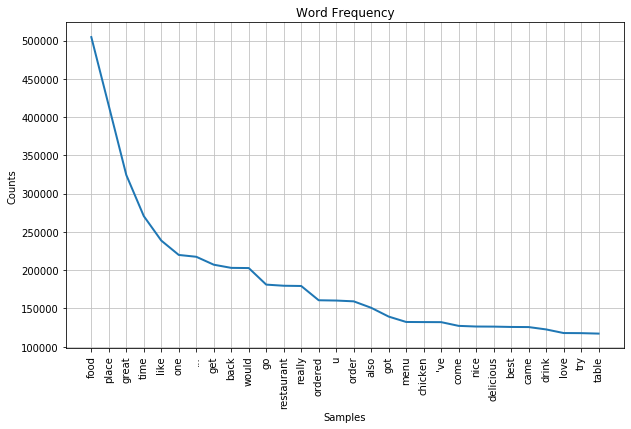

In [170]:
fig=plt.figure(figsize=(10,6))
plt.title('Word Frequency')
total_freq.plot(30, )
plt.show()
fig.savefig('Word_Frequency.png', dpi=300, bbox_inches='tight')


In [132]:
from wordcloud import WordCloud

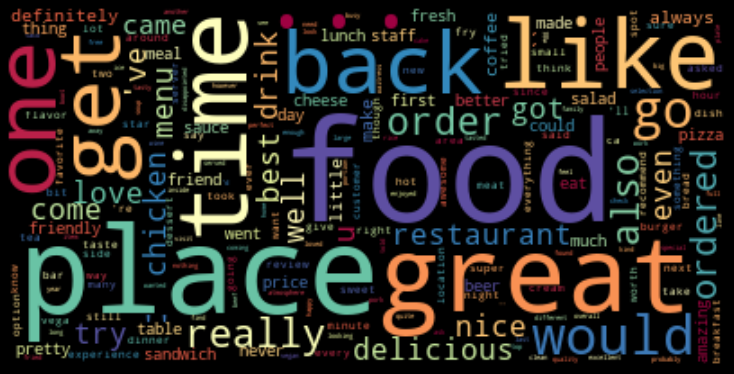

In [139]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(food_freq)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Save Image
plt.savefig('food_wordcloud.png')

plt.show()

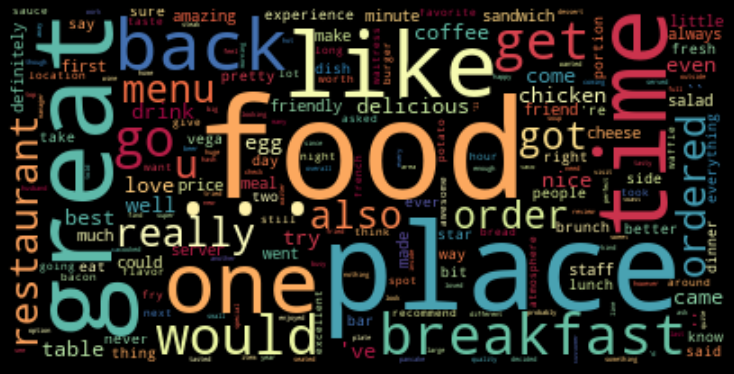

In [140]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(breakfast_freq)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Save Image
plt.savefig('breakfast_wordcloud.png')

plt.show()

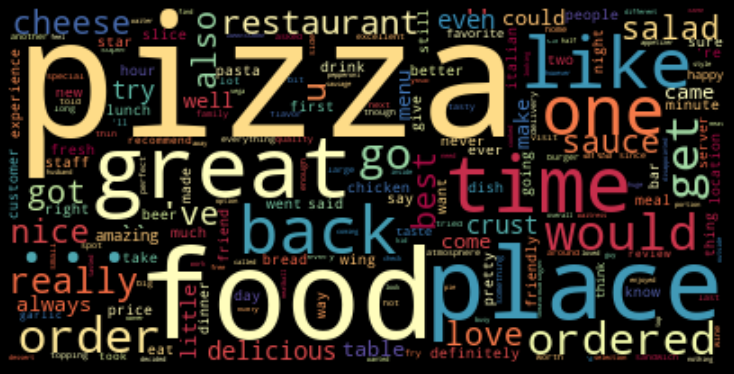

In [171]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(pizza_freq)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Save Image
plt.savefig('pizza_wordcloud.png')

plt.show()

## Baseline Model

In [40]:
#!pip install scikit-multilearn

In [66]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

In [104]:
# X and y variables for top 20 categories
X_20=processed_reviews_20
y_20=target_20

In [105]:
# Train Test Split X_20 and y_20
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.20, random_state=1)
tfidf_20 = TfidfVectorizer()

tfidf_data_train_20 = tfidf_20.fit_transform(X_train_20)
tfidf_data_test_20 = tfidf_20.transform(X_test_20)


In [106]:

# initialize binary relevance multi-label classifier
# with a Dummy Classifier base classifier predicting majority class for each tag
classifier_20 = BinaryRelevance(DummyClassifier(strategy='most_frequent'))
# train
classifier_20.fit(tfidf_data_train_20, y_train_20)
# predict
y_dummy_20 = classifier_20.predict(tfidf_data_test_20)

# print(accuracy_score(y_test, y_dummy))
# print(precision_score(y_test, y_dummy))
# print(f1_score(y_test, y_dummy))

In [73]:
y_dummy.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
print(accuracy_score(y_test_20, y_dummy_20))
print(precision_score(y_test_20, y_dummy_20,average='macro'))
print(f1_score(y_test_20, y_dummy_20,average='macro'))

0.0
0.0
0.0


C:\Users\Drago\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Although I looked at accuracy, precision and f1 score, precision will be the main evaluation metric because in predicting the tags or categories, false positives are worse because they can lead to misleading information about a restaurant and this would be especially bad if there are dietary tags/categories. 
### The baseline got a precision score of 0 so we will see how the other models compare

## Gaussian Naive Bayes

In [108]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier_GNB_20 = BinaryRelevance(GaussianNB())
# train
classifier_GNB_20.fit(tfidf_data_train_20, y_train_20)
# predict
y_GNB_20 = classifier_GNB_20.predict(tfidf_data_test_20)

In [109]:
print(accuracy_score(y_test_20, y_GNB_20))
print(precision_score(y_test_20, y_GNB_20,average='micro'))
print(f1_score(y_test_20, y_GNB_20,average='micro'))

0.05448717948717949
0.41845764854614415
0.2198605114579874


### A definite improvement over the baseline, but the precision is still very low. Next we will see how a Random Forest performs

## Random Forest Classifier

In [114]:
# initialize binary relevance multi-label classifier
# with a complement naive bayes base classifier
classifier_RFC_20 = BinaryRelevance(RandomForestClassifier(n_jobs=-1,verbose=1))
# train
classifier_RFC_20.fit(tfidf_data_train_20, y_train_20)
# predict
y_RFC_20 = classifier_RFC_20.predict(tfidf_data_test_20)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.3s
[

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [115]:
print(accuracy_score(y_test_20, y_RFC_20))
print(precision_score(y_test_20, y_RFC_20,average='micro'))
print(f1_score(y_test_20, y_RFC_20,average='micro'))

0.15705128205128205
0.9368932038834952
0.40803382663847776


### It is clear to see that the Random Forest performed the best with a precision score in the 90%s. So I will put together all the results for both training and test sets to see how they compare to the original category distribution.

In [117]:
y_train_RFC_20=classifier_RFC_20.predict(tfidf_data_train_20)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

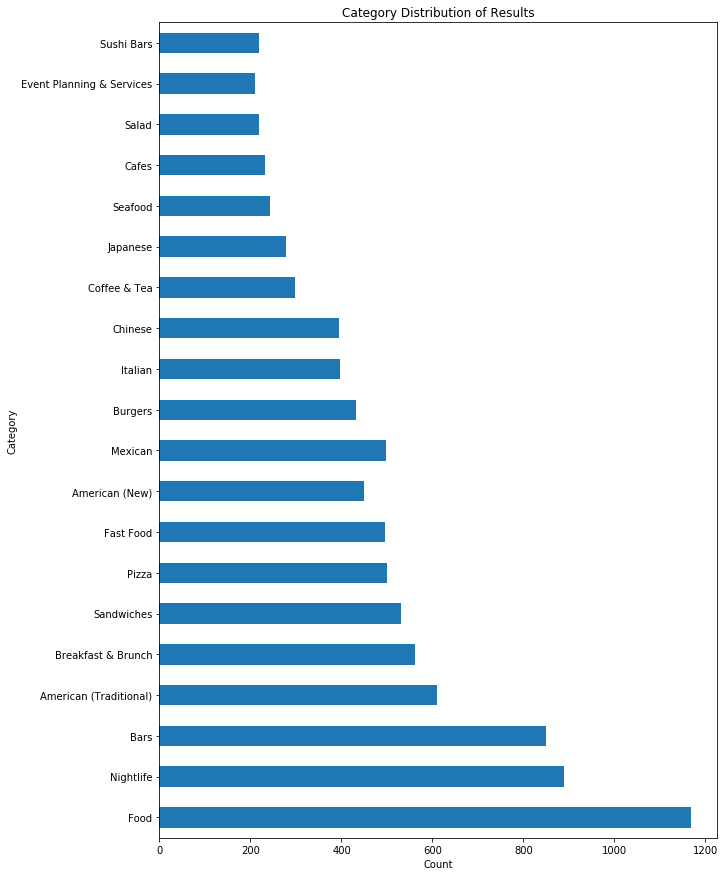

In [147]:
# Put together the training and test set predictions
df_results=pd.concat([pd.DataFrame(y_train_RFC_20.toarray(),columns=top_20),pd.DataFrame(y_RFC_20.toarray(),columns=top_20)])
# Graph the total category distribution
plt.title('Category Distribution of Results')
plt.ylabel('Category')
plt.xlabel('Count')
df_results.sum().plot(kind='barh',figsize=(10,15))
plt.savefig('Results_Category_Dist.png', dpi=300, bbox_inches='tight')

### The distribution is somewhat similar to the original, but it is clear that there are fewer labels in each category. This is supported by the f1 score which is fairly low and implies a high false negative rate. With more data and observations this may be able to be lowered